In [116]:
!pip install tensorflow

In [117]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [118]:
img = image.load_img("D:/computervision/training/kanao/1 (Custom).jpg")

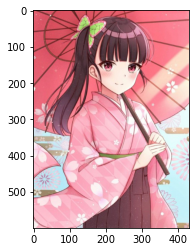

In [119]:
plt.imshow(img)

In [120]:
cv2.imread("D:/computervision/training/kanao/1 (Custom).jpg")

array([[[ 87,  72, 187],
        [ 89,  76, 186],
        [ 76,  64, 170],
        ...,
        [154, 144, 250],
        [153, 143, 249],
        [153, 143, 249]],

       [[ 90,  74, 192],
        [107,  94, 210],
        [111,  97, 209],
        ...,
        [154, 144, 250],
        [154, 144, 250],
        [153, 143, 249]],

       [[ 88,  71, 198],
        [111,  97, 223],
        [117, 101, 226],
        ...,
        [157, 145, 251],
        [156, 144, 250],
        [155, 143, 249]],

       ...,

       [[193, 193, 205],
        [233, 233, 245],
        [234, 234, 246],
        ...,
        [160, 169, 206],
        [191, 197, 234],
        [196, 202, 239]],

       [[193, 193, 207],
        [233, 233, 245],
        [233, 233, 245],
        ...,
        [175, 181, 216],
        [187, 189, 224],
        [186, 186, 222]],

       [[196, 196, 210],
        [235, 235, 249],
        [234, 234, 246],
        ...,
        [184, 190, 225],
        [179, 179, 215],
        [183, 181, 217]]

In [121]:
cv2.imread("D:/computervision/training/kanao/1 (Custom).jpg").shape

(600, 430, 3)

In [122]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [123]:
train_dataset = train.flow_from_directory('D:/computervision/training',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'categorical')

validation_dataset = train.flow_from_directory("D:/computervision/validation",
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'categorical')

Found 14 images belonging to 3 classes.
Found 14 images belonging to 3 classes.


In [124]:
train_dataset.class_indices

{'kanao': 0, 'nezuko': 1, 'tanjiro': 2}

In [125]:
train_dataset.classes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [126]:
import tensorflow as tf
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3), activation = 'relu', input_shape = (200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512, activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(3, activation = 'softmax')
                                   ])


In [127]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = RMSprop(lr=0.001),
             metrics = ['accuracy'])

In [128]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 100,
                     validation_data = validation_dataset)

Epoch 1/100
3/3 [==============================] - 1s 244ms/step - loss: 6.5409 - accuracy: 0.4444 - val_loss: 2.4002 - val_accuracy: 0.3571
Epoch 2/100
3/3 [==============================] - 1s 174ms/step - loss: 2.0942 - accuracy: 0.1250 - val_loss: 0.9033 - val_accuracy: 0.7143
Epoch 3/100
3/3 [==============================] - 1s 181ms/step - loss: 0.8532 - accuracy: 0.6667 - val_loss: 0.5695 - val_accuracy: 0.9286
Epoch 4/100
3/3 [==============================] - 1s 200ms/step - loss: 0.8651 - accuracy: 0.5556 - val_loss: 0.7260 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 1s 212ms/step - loss: 0.5174 - accuracy: 0.6667 - val_loss: 0.8054 - val_accuracy: 0.6429
Epoch 6/100
3/3 [==============================] - 1s 175ms/step - loss: 0.6796 - accuracy: 0.8750 - val_loss: 0.2734 - val_accuracy: 0.9286
Epoch 7/100
3/3 [==============================] - 1s 204ms/step - loss: 0.2578 - accuracy: 1.0000 - val_loss: 0.3207 - val_accuracy: 0.7857
Epoch 8/100
3

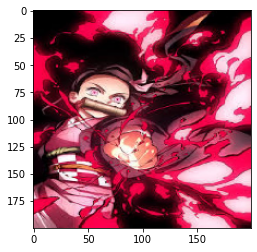

1/1 [==============================] - 0s 58ms/step
Nezuko


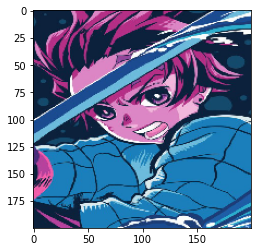

1/1 [==============================] - 0s 23ms/step
Tanjiro


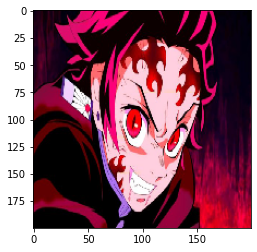

1/1 [==============================] - 0s 23ms/step
Tanjiro


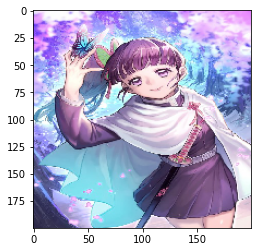

1/1 [==============================] - 0s 22ms/step
Kanao


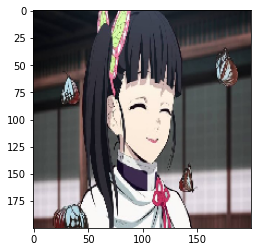

1/1 [==============================] - 0s 23ms/step
Kanao


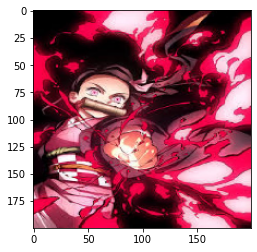

1/1 [==============================] - 0s 23ms/step
Nezuko


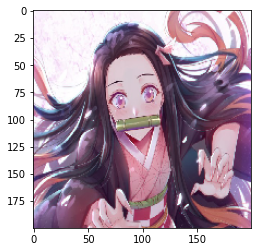

1/1 [==============================] - 0s 25ms/step
Nezuko


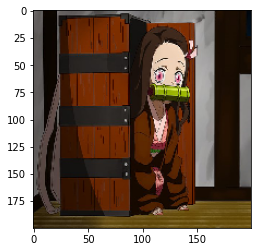

1/1 [==============================] - 0s 26ms/step
Nezuko


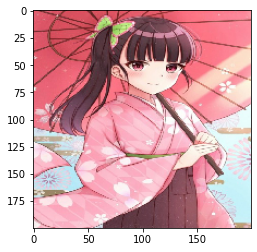

1/1 [==============================] - 0s 23ms/step
Kanao


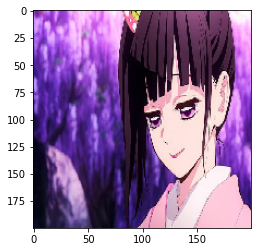

1/1 [==============================] - 0s 23ms/step
Kanao


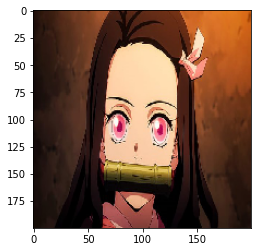

1/1 [==============================] - 0s 22ms/step
Nezuko


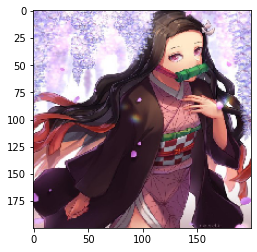

1/1 [==============================] - 0s 23ms/step
Nezuko


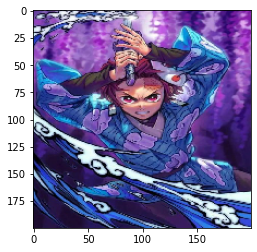

1/1 [==============================] - 0s 22ms/step
Tanjiro


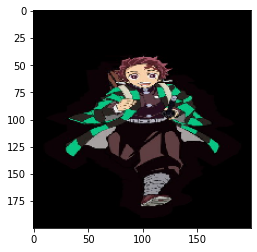

1/1 [==============================] - 0s 22ms/step
Tanjiro


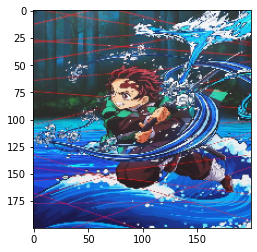

1/1 [==============================] - 0s 22ms/step
Tanjiro


In [130]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image

dir_path = 'D:/computervision/testing'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path + '//' + i, target_size=(200, 200))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)

    # Get the predicted class label
    label = np.argmax(val)

    if label == 0:
        print("Kanao")
    elif label == 1:
        print("Nezuko")
    elif label == 2:
        print("Tanjiro")
    else:
        print("kimetsu-no-yaiba")
